In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.7.0


[]

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
              'Sandals', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
def get_model1():
    inputs = keras.Input(shape=(28,28))
    flatten = layers.Flatten(input_shape=(28,28))(inputs)
    hidden1 = layers.Dense(512, activation="relu")(flatten)
    outputs = layers.Dense(10)(hidden1)
    return keras.Model(inputs, outputs)


def get_model2():
    inputs = keras.Input(shape=(28,28))
    flatten = layers.Flatten(input_shape=(28,28))(inputs)
    hidden1 = layers.Dense(512, activation="relu")(flatten)
    hidden2 = layers.Dense(256, activation="relu")(hidden1)
    outputs = layers.Dense(10)(hidden1)
    return keras.Model(inputs, outputs)

def get_model3():
    inputs = keras.Input(shape=(28,28))
    flatten = layers.Flatten(input_shape=(28,28))(inputs)
    hidden1 = layers.Dense(512, activation="relu")(flatten)
    hidden2 = layers.Dense(256, activation="relu")(hidden1)
    hidden3 = layers.Dense(128, activation="relu")(hidden2)
    outputs = layers.Dense(10)(hidden3)
    return keras.Model(inputs, outputs)

def get_model4():
    inputs = keras.Input(shape=(28,28))
    flatten = layers.Flatten(input_shape=(28,28))(inputs)
    hidden1 = layers.Dense(512, activation="relu")(flatten)
    hidden2 = layers.Dense(256, activation="relu")(hidden1)
    hidden3 = layers.Dense(128, activation="relu")(hidden2)
    hidden4 = layers.Dense(64, activation="relu")(hidden3)
    outputs = layers.Dense(10)(hidden4)
    return keras.Model(inputs, outputs)

In [6]:
model1 = get_model1()

model1.compile(optimizer="adam", 
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=10, batch_size=8192)


model2 = get_model2()

model2.compile(optimizer="adam", 
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=10, batch_size=8192)

model3 = get_model3()

model3.compile(optimizer="adam", 
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics=['accuracy'])

model3.fit(train_images, train_labels, epochs=10, batch_size=8192)


model4 = get_model4()

model4.compile(optimizer="adam", 
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics=['accuracy'])

model4.fit(train_images, train_labels, epochs=10, batch_size=8192)

Epoch 1/10
8/8 [==============================] - 1s 113ms/step - loss: 1.3888 - accuracy: 0.5384
Epoch 2/10
8/8 [==============================] - 1s 76ms/step - loss: 0.7309 - accuracy: 0.7461
Epoch 3/10
8/8 [==============================] - 1s 73ms/step - loss: 0.6089 - accuracy: 0.7926
Epoch 4/10
8/8 [==============================] - 1s 83ms/step - loss: 0.5481 - accuracy: 0.8135
Epoch 5/10
8/8 [==============================] - 1s 71ms/step - loss: 0.5095 - accuracy: 0.8258
Epoch 6/10
8/8 [==============================] - 1s 71ms/step - loss: 0.4816 - accuracy: 0.8360
Epoch 7/10
8/8 [==============================] - 1s 72ms/step - loss: 0.4624 - accuracy: 0.8428
Epoch 8/10
8/8 [==============================] - 1s 73ms/step - loss: 0.4472 - accuracy: 0.8470
Epoch 9/10
8/8 [==============================] - 0s 61ms/step - loss: 0.4335 - accuracy: 0.8511
Epoch 10/10
8/8 [==============================] - 0s 61ms/step - loss: 0.4218 - accuracy: 0.8548
Epoch 1/10
8/8 [============

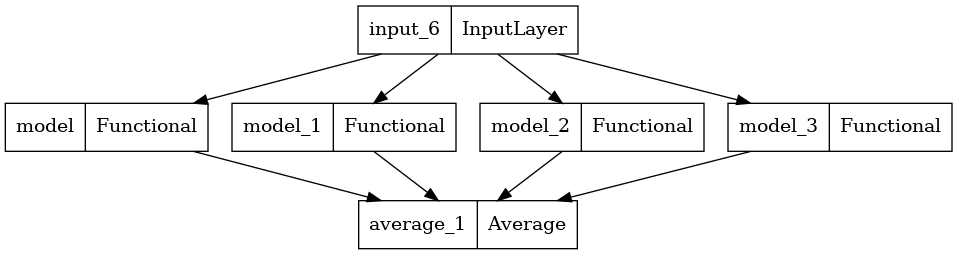

In [10]:
inputs = keras.Input(shape=(28,28))

y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
y4 = model4(inputs)

outputs = layers.average([y1, y2, y3, y4])
parallel_model = keras.Model(inputs=inputs, outputs=outputs)

parallel_model.compile(optimizer="adam", 
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics=['accuracy'])

keras.utils.plot_model(parallel_model, "parallel_model.png")

In [11]:
test_loss, test_acc = parallel_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.4195 - accuracy: 0.8536 - 1s/epoch - 4ms/step


In [12]:
parallel_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 model (Functional)             (None, 10)           407050      ['input_6[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 10)           407050      ['input_6[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 10)           567434      ['input_6[0][0]']                
                                                                                            

In [13]:
#parallel_model.compile(optimizer="adam", 
                      #loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             #metrics=['accuracy'])

#keras.utils.plot_model(parallel_model, "parallel_model.png")

In [14]:
parallel_model.fit(train_images, train_labels, epochs=10, batch_size=8192)


Epoch 1/10
8/8 [==============================] - 3s 327ms/step - loss: 0.8697 - accuracy: 0.7599
Epoch 2/10
8/8 [==============================] - 3s 372ms/step - loss: 0.5080 - accuracy: 0.8256
Epoch 3/10
8/8 [==============================] - 3s 349ms/step - loss: 0.4482 - accuracy: 0.8464
Epoch 4/10
8/8 [==============================] - 3s 362ms/step - loss: 0.4167 - accuracy: 0.8579
Epoch 5/10
8/8 [==============================] - 3s 352ms/step - loss: 0.3949 - accuracy: 0.8633
Epoch 6/10
8/8 [==============================] - 3s 359ms/step - loss: 0.3798 - accuracy: 0.8682
Epoch 7/10
8/8 [==============================] - 3s 353ms/step - loss: 0.3697 - accuracy: 0.8706
Epoch 8/10
8/8 [==============================] - 3s 361ms/step - loss: 0.3592 - accuracy: 0.8731
Epoch 9/10
8/8 [==============================] - 3s 356ms/step - loss: 0.3496 - accuracy: 0.8766
Epoch 10/10
8/8 [==============================] - 3s 377ms/step - loss: 0.3403 - accuracy: 0.8796


In [15]:
test_loss, test_acc = parallel_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3810 - accuracy: 0.8661 - 945ms/epoch - 3ms/step


The combined model did slightly better than when trained separately!